# Stock prediction with deep learning



## EDA
 In this section I will read the datasets and perform some EDA actions on data to have a better image. I visualise the distribution of data and correlation between "Open" and "Close" price. As well I compare "High" and "Close" prices and figure out the seasonal trends in datasets.

In [1]:
#importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import yfinance as yf
%matplotlib inline

C:\Users\Arsene\anaconda3\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
def load_share(ticker):
    t = yf.Ticker(ticker)
    return t

apple = load_share('AAPL')
amd = load_share('AMD')
amazon = load_share('AMZN')
apple.info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 164000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. Further, it provides AppleCare support and cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Fitness+, a personalized fitness service; Apple Music, which offers users a curated listening experience with on-demand rad

In [3]:
apple_share_price = apple.history(period="max")
amd_share_price = amd.history(period="max")
amazon_share_price = amazon.history(period="max")
apple_share_price.head(5)

Open      High       Low     Close     Volume  Dividends  \
Date                                                                       
1980-12-12  0.099874  0.100308  0.099874  0.099874  469033600        0.0   
1980-12-15  0.095098  0.095098  0.094663  0.094663  175884800        0.0   
1980-12-16  0.088149  0.088149  0.087715  0.087715  105728000        0.0   
1980-12-17  0.089886  0.090320  0.089886  0.089886   86441600        0.0   
1980-12-18  0.092492  0.092926  0.092492  0.092492   73449600        0.0   

            Stock Splits  
Date                      
1980-12-12           0.0  
1980-12-15           0.0  
1980-12-16           0.0  
1980-12-17           0.0  
1980-12-18           0.0

In [4]:
amazon_share_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6427 entries, 1997-05-15 to 2022-11-25
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          6427 non-null   float64
 1   High          6427 non-null   float64
 2   Low           6427 non-null   float64
 3   Close         6427 non-null   float64
 4   Volume        6427 non-null   int64  
 5   Dividends     6427 non-null   int64  
 6   Stock Splits  6427 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 401.7 KB


In [5]:
amazon_share_price.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [6]:
amd_share_price.describe()

Open          High           Low         Close        Volume  \
count  10767.000000  10767.000000  10767.000000  10767.000000  1.076700e+04   
mean      15.809772     16.460728     15.751428     16.107148  1.783120e+07   
std       21.699524     21.955737     21.015819     21.490867  2.774261e+07   
min        0.000000      1.690000      1.610000      1.620000  0.000000e+00   
25%        4.875000      5.375000      5.062500      5.250000  1.203700e+06   
50%        9.687500      9.875000      9.437500      9.660000  6.560400e+06   
75%       15.830000     16.100000     15.500000     15.800000  2.157480e+07   
max      163.279999    164.460007    156.100006    161.910004  3.250584e+08   

       Dividends  Stock Splits  
count    10767.0  10767.000000  
mean         0.0      0.000697  
std          0.0      0.036375  
min          0.0      0.000000  
25%          0.0      0.000000  
50%          0.0      0.000000  
75%          0.0      0.000000  
max          0.0      2.000000

In [7]:
amd_share_price.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [8]:
#see the description of datasets
apple_share_price.describe()

Open          High           Low         Close        Volume  \
count  10579.000000  10579.000000  10579.000000  10579.000000  1.057900e+04   
mean      15.518753     15.695464     15.345270     15.527208  3.282271e+08   
std       34.340289     34.757190     33.938153     34.364994  3.380272e+08   
min        0.038647      0.038647      0.038213      0.038213  0.000000e+00   
25%        0.236524      0.242240      0.231840      0.236758  1.217674e+08   
50%        0.400621      0.407709      0.393190      0.400363  2.154208e+08   
75%       13.714418     13.916954     13.582797     13.736576  4.072796e+08   
max      181.576172    181.884380    178.086416    180.959747  7.421641e+09   

          Dividends  Stock Splits  
count  10579.000000  10579.000000  
mean       0.000646      0.001607  
std        0.010540      0.085303  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max        0.230000      7.000000

As it shows there is a high difference between min and max values for all the columns, and most of data is close to mean value.

In [9]:
apple_share_price.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

There is no null value in this dataset

In [34]:
# apple_share_price.reset_index(inplace=True)
# amazon_share_price.reset_index(inplace=True)
# amd_share_price.reset_index(inplace=True)

In [10]:
fig = px.histogram(apple_share_price, 
                   x='Close', 
                   marginal='box', 
                   nbins=50, 
                   title='Distribution of Close price for Apple')
fig.update_layout(bargap=0.2)

In [11]:
fig = px.histogram(apple_share_price, 
                   x='Open', 
                   marginal='box', 
                   nbins=50, 
                   title='Distribution of Open price for Apple')
fig.update_layout(bargap=0.2)

In [12]:
fig = px.scatter(apple_share_price, 
                   y='Close',
                   x='Open', 
                   title='Open vs Close price Apple share')

fig.update_traces(marker_size=5)

In [13]:
apple_corr = apple_share_price.corr()
apple_corr

Open      High       Low     Close    Volume  Dividends  \
Open          1.000000  0.999940  0.999925  0.999842 -0.211946   0.098284   
High          0.999940  1.000000  0.999912  0.999925 -0.211442   0.097762   
Low           0.999925  0.999912  1.000000  0.999927 -0.212747   0.098038   
Close         0.999842  0.999925  0.999927  1.000000 -0.212106   0.097970   
Volume       -0.211946 -0.211442 -0.212747 -0.212106  1.000000  -0.031655   
Dividends     0.098284  0.097762  0.098038  0.097970 -0.031655   1.000000   
Stock Splits  0.012557  0.012807  0.012547  0.012785  0.001322  -0.001155   

              Stock Splits  
Open              0.012557  
High              0.012807  
Low               0.012547  
Close             0.012785  
Volume            0.001322  
Dividends        -0.001155  
Stock Splits      1.000000

In [37]:
amd_corr = amd_share_price.corr()
amd_corr

Open      High       Low     Close    Volume  Dividends  \
Open          1.000000  0.998199  0.998171  0.997785  0.504404        NaN   
High          0.998199  1.000000  0.999646  0.999702  0.503352        NaN   
Low           0.998171  0.999646  1.000000  0.999691  0.497235        NaN   
Close         0.997785  0.999702  0.999691  1.000000  0.500499        NaN   
Volume        0.504404  0.503352  0.497235  0.500499  1.000000        NaN   
Dividends          NaN       NaN       NaN       NaN       NaN        NaN   
Stock Splits -0.002781 -0.000661 -0.000809 -0.000585 -0.011159        NaN   

              Stock Splits  
Open             -0.002781  
High             -0.000661  
Low              -0.000809  
Close            -0.000585  
Volume           -0.011159  
Dividends              NaN  
Stock Splits      1.000000

In [38]:
amazon_corr = amazon_share_price.corr()
amazon_corr

Open      High       Low     Close    Volume  Dividends  \
Open          1.000000  0.999917  0.999896  0.999796 -0.257689        NaN   
High          0.999917  1.000000  0.999871  0.999901 -0.256540        NaN   
Low           0.999896  0.999871  1.000000  0.999907 -0.258940        NaN   
Close         0.999796  0.999901  0.999907  1.000000 -0.257737        NaN   
Volume       -0.257689 -0.256540 -0.258940 -0.257737  1.000000        NaN   
Dividends          NaN       NaN       NaN       NaN       NaN        NaN   
Stock Splits  0.021668  0.022268  0.021715  0.021590  0.015622        NaN   

              Stock Splits  
Open              0.021668  
High              0.022268  
Low               0.021715  
Close             0.021590  
Volume            0.015622  
Dividends              NaN  
Stock Splits      1.000000

as it shows in the graph above and in the table, there is a high correlation between open and close and High prices.

Text(0.5, 1.0, 'Apple stock attributes from 2006 to 2020')

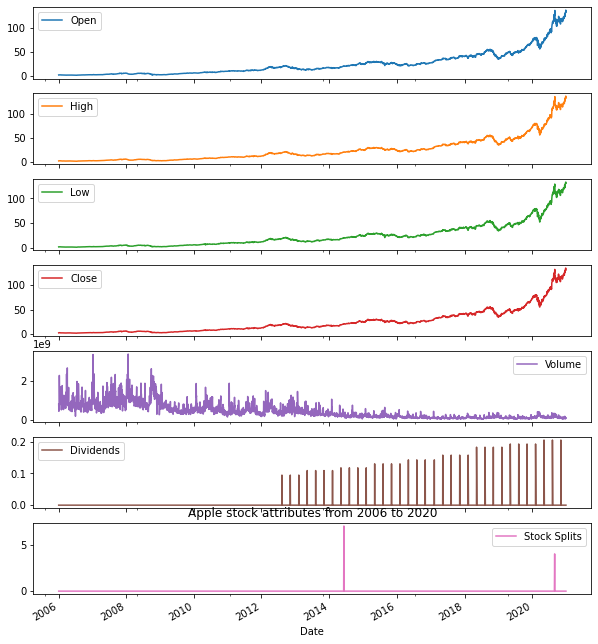

In [14]:
apple_share_price['2006':'2020'].plot(subplots=True, figsize=(10,12))
plt.title('Apple stock attributes from 2006 to 2020')

Text(0.5, 1.0, 'AMD stock attributes from 2006 to 2020')

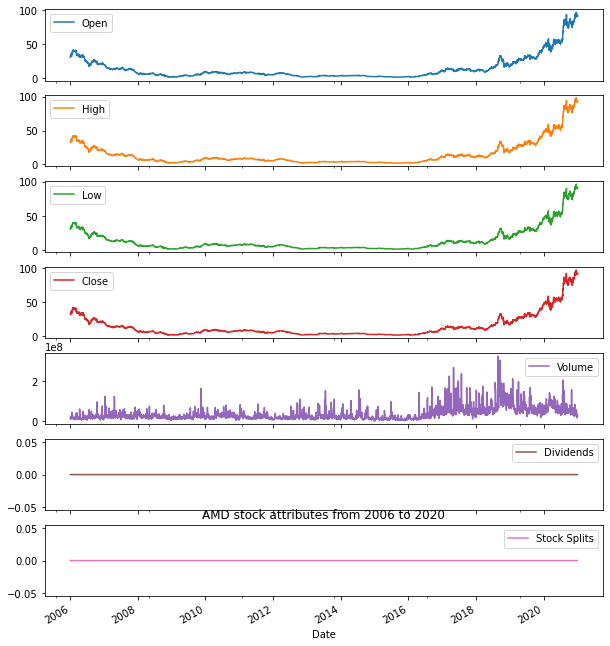

In [53]:
amd_share_price['2006':'2020'].plot(subplots=True, figsize=(10,12))
plt.title('AMD stock attributes from 2006 to 2020')

Text(0.5, 1.0, 'Amazon stock attributes from 2006 to 2020')

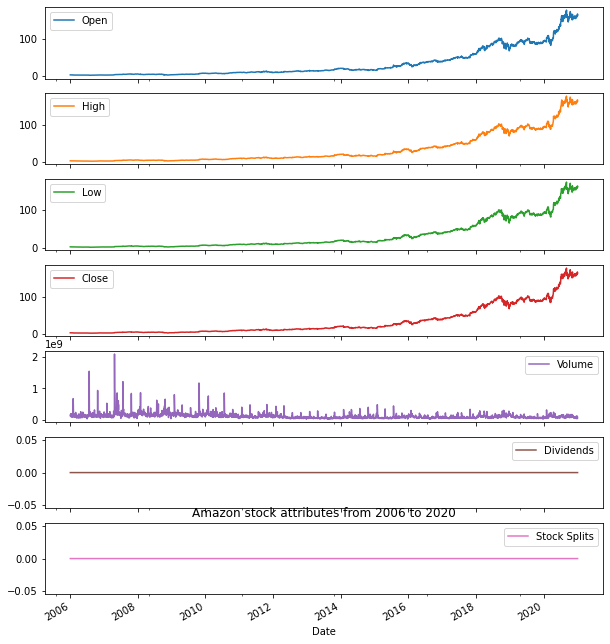

In [15]:
amazon_share_price['2006':'2020'].plot(subplots=True, figsize=(10,12))
plt.title('Amazon stock attributes from 2006 to 2020')

### High column Plots

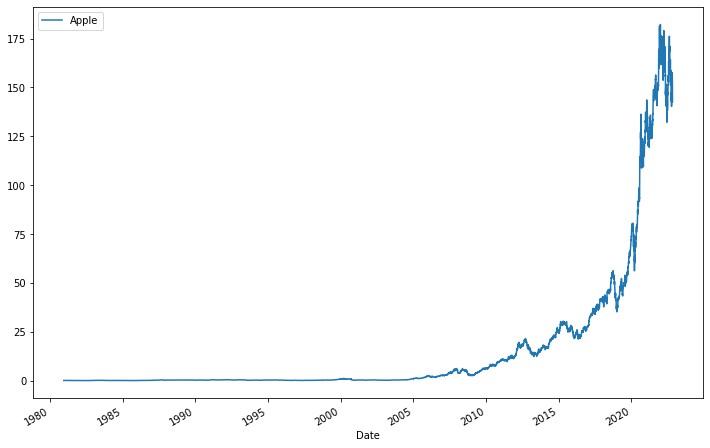

In [55]:
apple_share_price.High.plot(figsize=(12,8))
plt.legend(['Apple'])

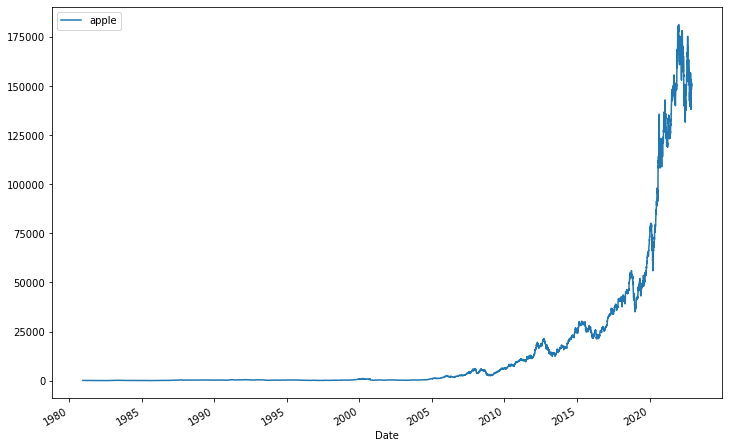

In [16]:
#normalising data
normalised_apple = apple_share_price.High.div(apple_share_price.High.iloc[0]).mul(100)
normalised_apple.plot(figsize=(12,8))
plt.legend(['apple'])

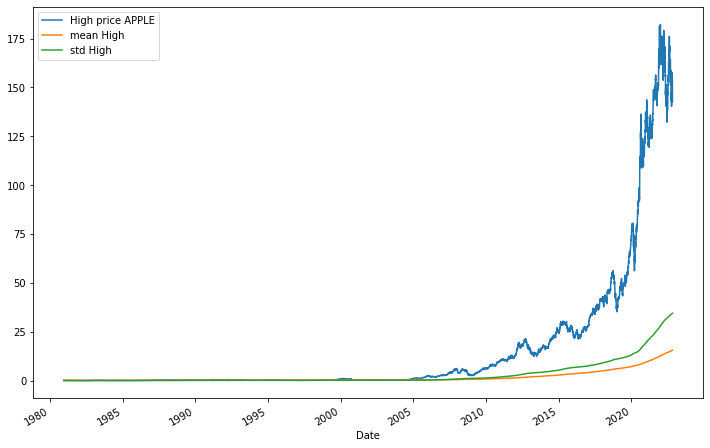

In [58]:
#Expanding window functions
apple_expanding_mean = apple_share_price.High.expanding().mean()
apple_expanding_std= apple_share_price.High.expanding().std()
apple_share_price.High.plot(figsize=(12,8))
apple_expanding_mean.plot()
apple_expanding_std.plot()
plt.legend(['High price APPLE','mean High','std High'])

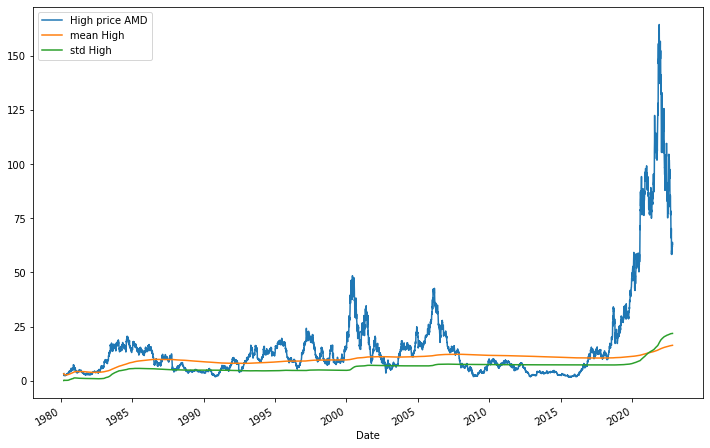

In [59]:
amd_expanding_mean = amd_share_price.High.expanding().mean()
amd_expanding_std= amd_share_price.High.expanding().std()
amd_share_price.High.plot(figsize=(12,8))
amd_expanding_mean.plot()
amd_expanding_std.plot()
plt.legend(['High price AMD','mean High','std High'])

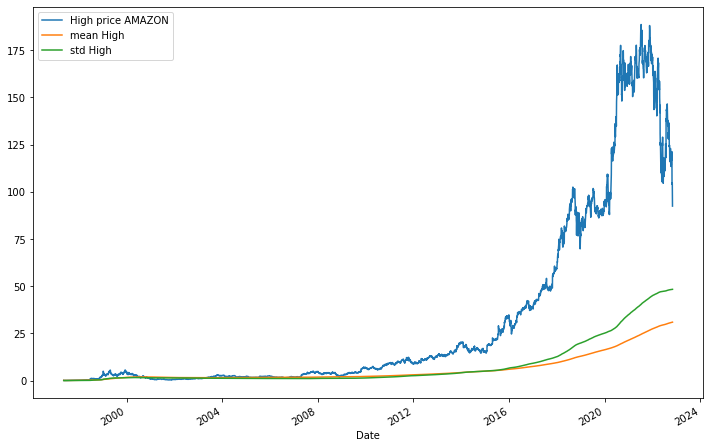

In [60]:
amazon_expanding_mean = amazon_share_price.High.expanding().mean()
amazon_expanding_std= amazon_share_price.High.expanding().std()
amazon_share_price.High.plot(figsize=(12,8))
amazon_expanding_mean.plot()
amazon_expanding_std.plot()
plt.legend(['High price AMAZON','mean High','std High'])

### Close Column Plots

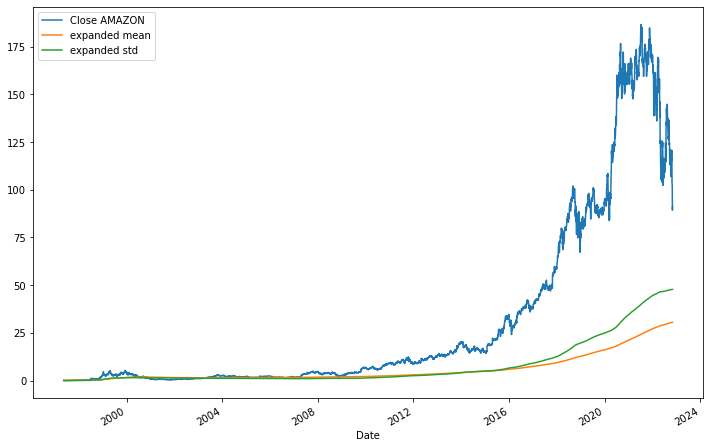

In [62]:
amazon_close_expand_mean = amazon_share_price.Close.expanding().mean()
amazon_close_expand_std = amazon_share_price.Close.expanding().std()
amazon_share_price.Close.plot(figsize=(12,8))
amazon_close_expand_mean.plot()
amazon_close_expand_std.plot()
plt.legend(['Close AMAZON','expanded mean','expanded std'])

## Trends for "High" and "Close" cols

In [63]:
from pylab import rcParams
import statsmodels.api as sm

In [64]:
rcParams['figure.figsize'] = 12, 9

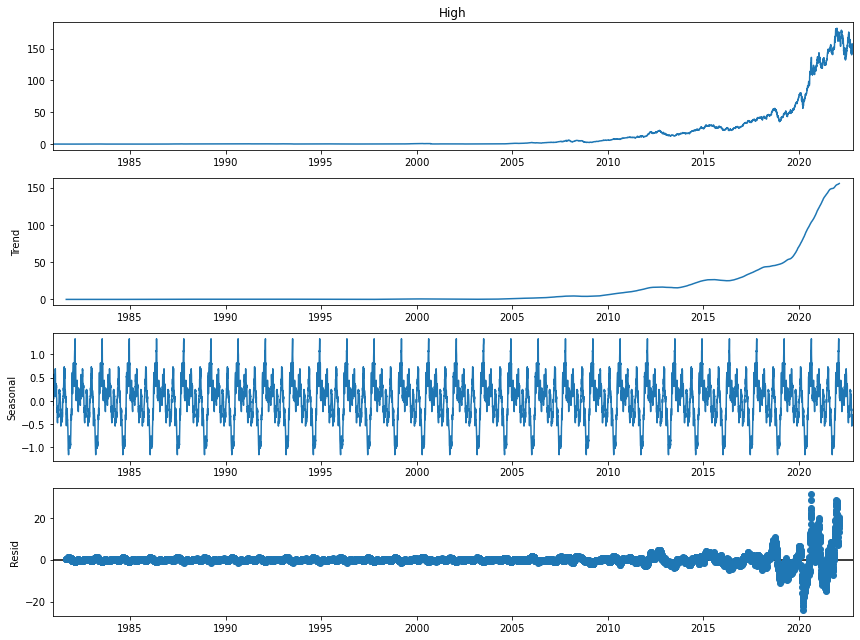

In [66]:
rcParams['figure.figsize'] = 12, 9
decomposed_apple_volume = sm.tsa.seasonal_decompose(apple_share_price["High"],period=360) # The frequncy is annual
figure = decomposed_apple_volume.plot()

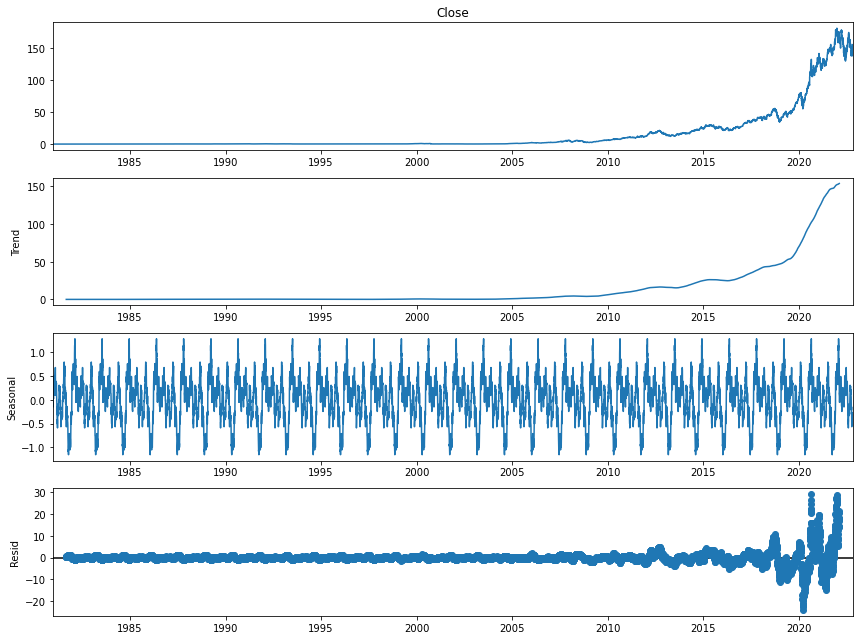

In [67]:
decomposed_apple_volume = sm.tsa.seasonal_decompose(apple_share_price["Close"],period=360) # The frequncy is annual
figure = decomposed_apple_volume.plot()

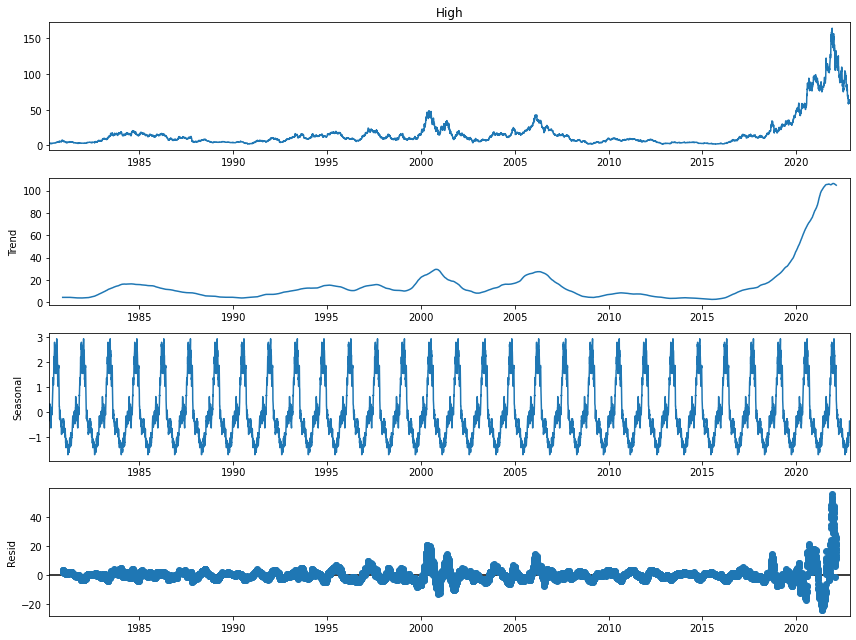

In [68]:
decomposed_amd_volume = sm.tsa.seasonal_decompose(amd_share_price["High"],period=360) # The frequncy is annual
figure = decomposed_amd_volume.plot()

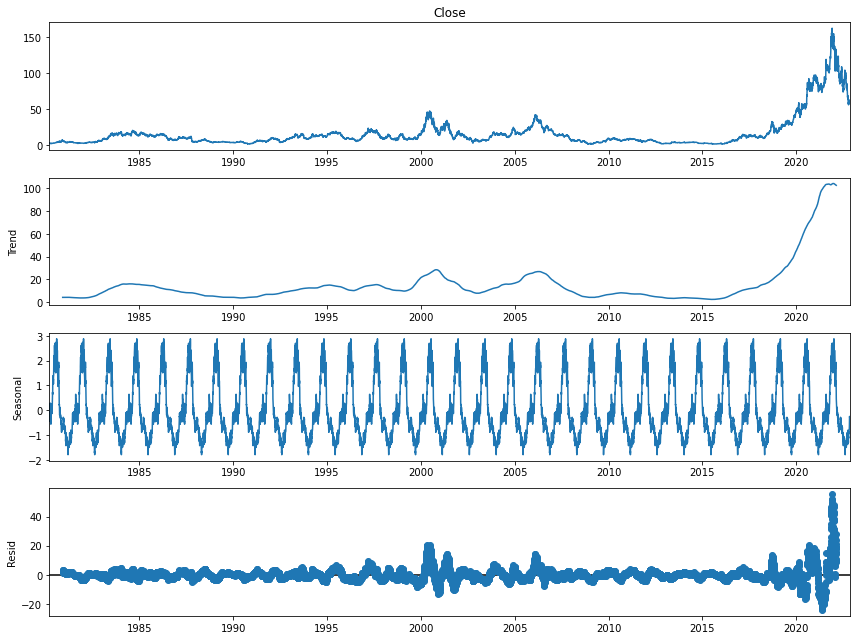

In [69]:
decomposed_amd_volume = sm.tsa.seasonal_decompose(amd_share_price["Close"],period=360) # The frequncy is annual
figure = decomposed_amd_volume.plot()

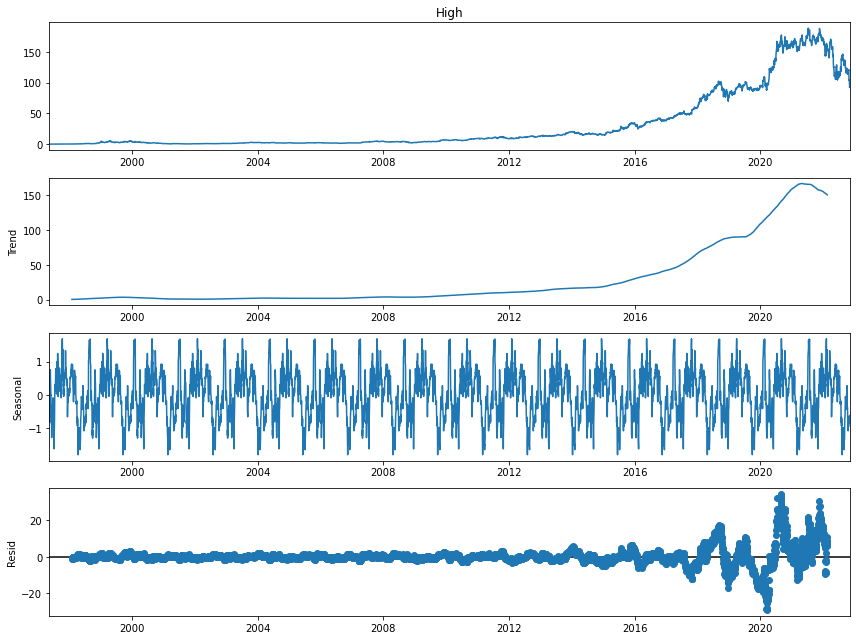

In [70]:
decomposed_amazon_volume = sm.tsa.seasonal_decompose(amazon_share_price["High"],period=360) # The frequncy is annual
figure = decomposed_amazon_volume.plot()

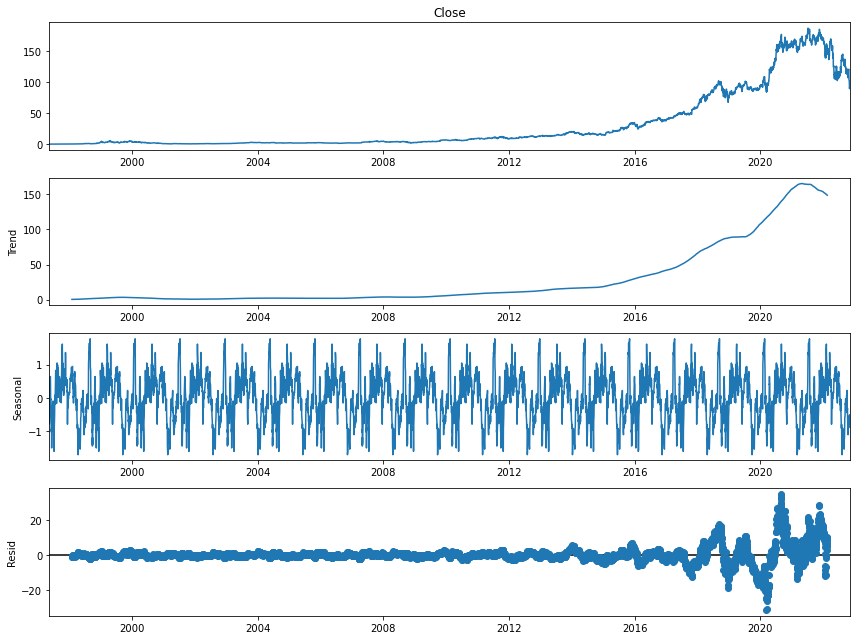

In [71]:
decomposed_amazon_volume = sm.tsa.seasonal_decompose(amazon_share_price["Close"],period=360) # The frequncy is annual
figure = decomposed_amazon_volume.plot()

## Stock Prediction
Stock prices in nature are time series. in order to predict stock prices for this example I want to use LSTM model. LSTMs stands for " Long short term memory" are recurrent neural networks that have a longer memory and they are well used to predict time series.

In [34]:
# stock price dist
def stock_dist(df,df_name):
    apple_share_price.reset_index()
    sns.set_style(style='whitegrid')
    plt.figure(figsize=(14,9))
    plt.plot(df[['Close']])
    plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)
    plt.xlabel('Date', fontsize=13)
    plt.ylabel('Close price USD', fontsize=13)
    plt.title('{} Stock Close Prices'.format(df_name))

In [36]:
amd_share_price

Open       High        Low      Close     Volume  Dividends  \
Date                                                                           
1980-03-17   0.000000   3.302083   3.125000   3.145833     219600          0   
1980-03-18   0.000000   3.125000   2.937500   3.031250     727200          0   
1980-03-19   0.000000   3.083333   3.020833   3.041667     295200          0   
1980-03-20   0.000000   3.062500   3.010417   3.010417     159600          0   
1980-03-21   0.000000   3.020833   2.906250   2.916667     130800          0   
...               ...        ...        ...        ...        ...        ...   
2022-10-31  60.750000  61.860001  59.529999  60.060001   73274100          0   
2022-11-01  61.490002  61.990002  59.430000  59.660000   83806700          0   
2022-11-02  63.000000  63.930000  58.570000  58.630001  142669400          0   
2022-11-03  58.110001  62.279999  58.029999  60.110001   95279900          0   
2022-11-04  62.500000  63.000000  60.529999  62.189999   84751100          0   

            Stock Splits  
Date                      
1980-03-17           0.0  
1980-03-18           0.0  
1980-03-19           0.0  
1980-03-20           0.0  
1980-03-21           0.0  
...                  ...  
2022-10-31           0.0  
2022-11-01           0.0  
2022-11-02           0.0  
2022-11-03           0.0  
2022-11-04           0.0  

[10753 rows x 7 columns]

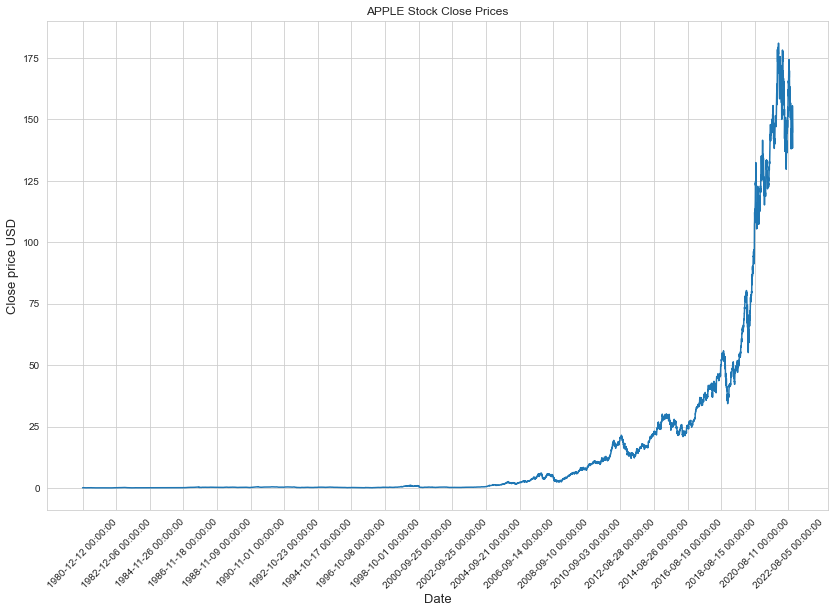

In [30]:
stock_dist(apple_share_price,'APPLE')

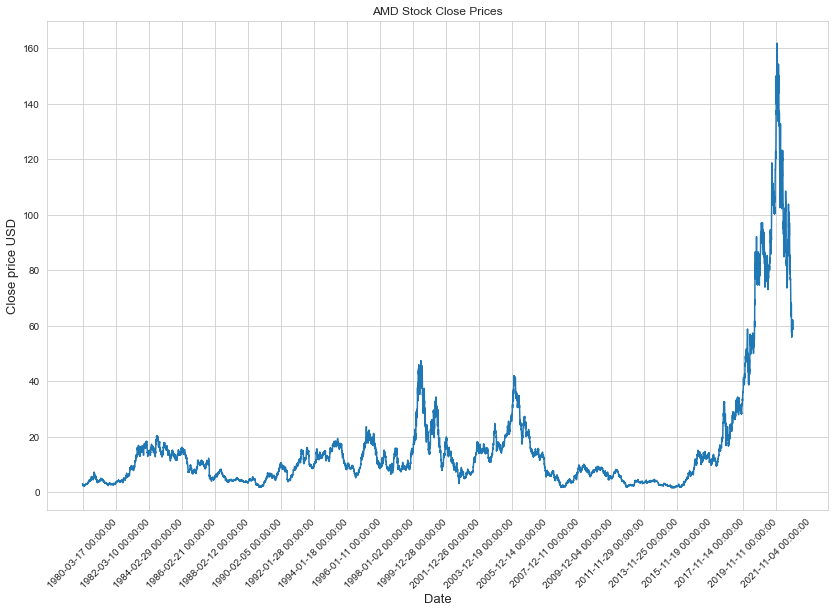

In [37]:
stock_dist(amd_share_price.reset_index(),'AMD')

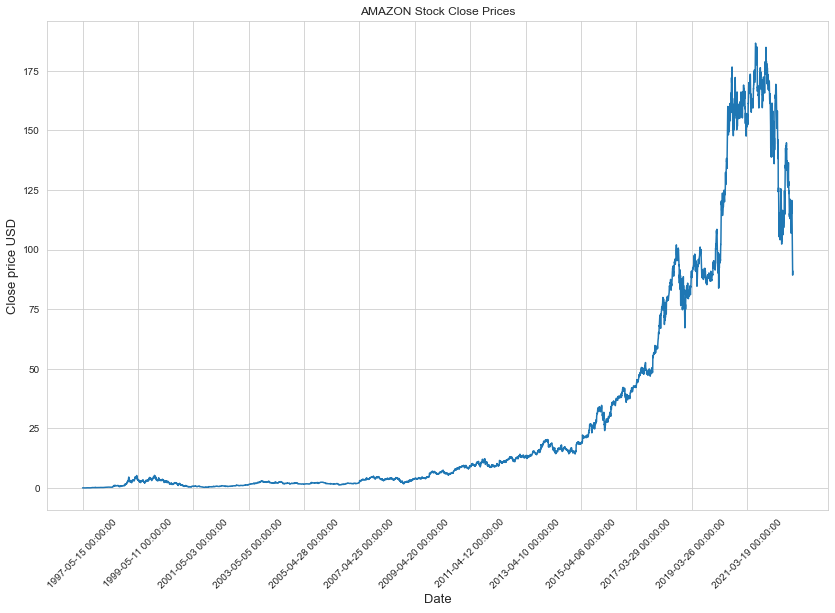

In [38]:
stock_dist(amazon_share_price.reset_index(),'AMAZON')

In [39]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [40]:
price_apple = apple_share_price[['Close']]
price_amd = amd_share_price[['Close']]
price_amazon = amazon_share_price[['Close']]

In [47]:
scaler = MinMaxScaler(feature_range=(-1,1))
def scaling_df(price_df):
    price_df= scaler.fit_transform(price_df['Close'].values.reshape(-1,1))
    return price_df

In [48]:
price_apple['Close'] = scaling_df(price_apple)
price_amd['Close'] = scaling_df(price_amd)
price_amazon['Close'] = scaling_df(price_amazon)

<ipython-input-48-8a32725fca6b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_apple['Close'] = scaling_df(price_apple)
<ipython-input-48-8a32725fca6b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_amd['Close'] = scaling_df(price_amd)
<ipython-input-48-8a32725fca6b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [44]:
price_amazon['Close'].head()

Date
1997-05-15   -0.999698
1997-05-16   -0.999821
1997-05-19   -0.999832
1997-05-20   -0.999872
1997-05-21   -0.999983
Name: Close, dtype: float64

In [50]:
# Split train data and test data
def train_test_split (df , train_s = .8):
    train_size = int(len(df)*train_s)
    train_data = df.iloc[:train_size]
    test_data = df.iloc[train_size:]
    return train_data, test_data

apple_train,apple_test = train_test_split(price_apple)
amd_train,amd_test = train_test_split(price_amd)
amazon_train,amazon_test = train_test_split(price_amazon)




In [63]:
import time

In [58]:
# Create input dataset
def create_dataset (X, look_back = 1):
    Xd, yd = [], []
 
    for i in range(len(X)-look_back):
        Xd.append(X[i:i+look_back])
        yd.append(X[i+look_back:])
 
    return np.array(Xd), np.array(yd)

#param
LOOK_BACK = 20
X_train_apple, y_train_apple = create_dataset(apple_train,LOOK_BACK)
X_test_apple, y_test_apple = create_dataset(apple_test,LOOK_BACK)

X_train_amd, y_train_amd = create_dataset(amd_train,LOOK_BACK)
X_test_amd, y_test_amd = create_dataset(amd_test,LOOK_BACK)

X_train_amazon, y_train_amazon = create_dataset(amazon_train,LOOK_BACK)
X_test_amazon, y_test_amazon = create_dataset(amazon_test,LOOK_BACK)

# Print data shape
print('X_train_apple.shape: ',X_train_apple.shape)
print('y_train_apple.shape: ', y_train_apple.shape)
print('X_test_apple.shape: ', X_test_apple.shape) 
print('y_test_apple.shape: ', y_test_apple.shape)


<ipython-input-58-9ca4e3bd6853>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(Xd), np.array(yd)


X_train_apple.shape:  (8432, 20, 1)
y_train_apple.shape:  (8432,)
X_test_apple.shape:  (2093, 20, 1)
y_test_apple.shape:  (2093,)


In [61]:
# function to Create GRU model
def create_gru(units,X_train):
    model = tf.keras.Sequential([
        #Input layer
        tf.keras.layers.GRU(units, 
                             return_sequences=True,
                             input_shape = [X_train.shape[1],X_train.shape[2]]),
        tf.keras.layers.Dropout(0.2),
        
        #Hidden layer
        tf.keras.layers.GRU(units),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(units=1)
    ])
    #Compile model
    model.compile(optimizer='adam',loss='mse')
    return model

#Creating the model
model_gru_apple = create_gru(32,X_train_apple)
model_gru_amd = create_gru(32,X_train_amd)
model_gru_amazon = create_gru(32,X_train_amazon)

In [64]:
def train_model(model, X_train,y_train):
    early_stopping  =tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                                      patience = 8)
    fitted_model = model.fit(X_train, y_train, epochs = 100,  
                        validation_split = 0.2,
                        batch_size = 16, 
                        shuffle = False, 
                        callbacks = [early_stopping])
    return fitted_model

start_time = time.time()
history_gru_apple = train_model(model_gru_apple,X_train_apple,y_train_apple)
training_time = time.time()-start_time    
print("Apple Training time: {}".format(training_time))

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type DataFrame).

In [ ]:
start_time = time.time()
history_gru_amd = train_model(model_gru_amd,X_train_amd,y_train_amd)
training_time = time.time()-start_time    
print("AMD Training time: {}".format(training_time))

In [ ]:
start_time = time.time()
history_gru_amazon = train_model(model_gru_amazon,X_train_amazon,y_train_amazon)
training_time = time.time()-start_time    
print("Amazon Training time: {}".format(training_time))

In [ ]:
def inverse_scaled(y_test,y_train):
    y_test = scaler.inverse_transform(y_test)
    y_train = scaler.inverse_transform(y_train)
    return y_test,y_train

y_test_apple = scaler.inverse_transform(y_test_apple)
y_train_apple = scaler.inverse_transform(y_train_apple)



In [ ]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history[‘loss’])
    plt.plot(history.history[‘val_loss’])
    plt.title(‘Model Train vs Validation Loss for ‘ + model_name)
    plt.ylabel(‘Loss’)
    plt.xlabel(‘epoch’)
    plt.legend([‘Train loss’, ‘Validation loss’], loc=’upper right’)

plot_loss (history_gru, ‘GRU’)